In [1]:
import numpy as np
import mplstereonet as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *
from plots import *

%matplotlib inline

In [2]:
kynematic_window = 30 #degrees

In [3]:
dipdir_slope_mean = 70
dip_slope_mean = 70


In [4]:
# dipdir_slope = np.random.normal(220,30,500)
# dipdir_slope = [int(i) for i in dipdir_slope]
# df['dipdir_slope'] = dipdir_slope
# dip_slope = np.random.normal(60,2,500)
# dip_slope = [int(i) for i in dip_slope]
# df['dip_slope'] = dip_slope
# df

In [5]:
mu_dir, sigma_dir = 240,7
mu_dip,sigma_dip = 45,5
df = generate_structures(mu_dir, sigma_dir, mu_dip,sigma_dip)

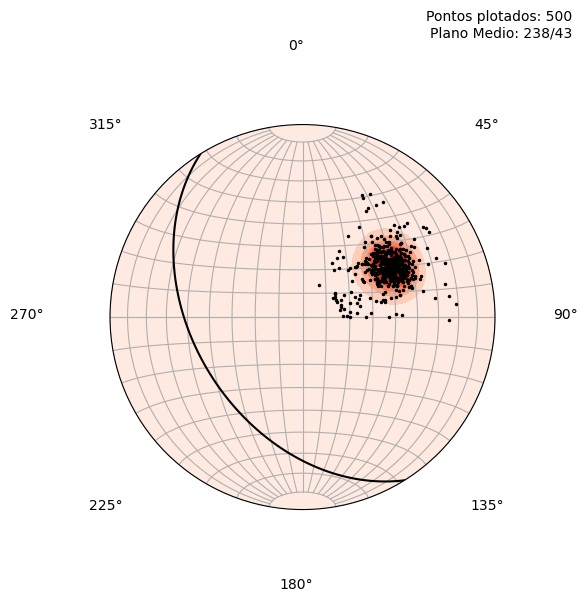

In [6]:
simple_stereogram(df.dipdir, df.dip)

In [7]:
friction =  {'Itabirite': 37, 'Slate':28, 'Schist':30,'Quartzite':35}
df['friction'] = df['litho'].map(friction)

structure =  {'Itabirite': 'Sb', 'Slate':'Sb', 'Schist':'Sn','Quartzite':'Sb'}
df['structure'] = df['litho'].map(structure)

df

,dipdir,dip,litho,friction,structure
0,244,44,Quartzite,35,Sb
1,243,43,Schist,30,Sn
2,242,45,Itabirite,37,Sb
3,232,43,Slate,28,Sb
4,231,36,Quartzite,35,Sb
...,...,...,...,...,...
495,252,43,Slate,28,Sb
496,238,58,Quartzite,35,Sb
497,207,15,Schist,30,Sn
498,230,41,Itabirite,37,Sb


In [8]:
def paralellism(dipdir_struct, dipdir_slope, kynematic_window=30):
  a = dipdir_to_xy(dipdir_struct)
  b = dipdir_to_xy(dipdir_slope)
  angle = np.around(np.degrees(np.arccos(np.dot(a,b))),decimals=0)
  if  angle <= kynematic_window:
    return True
  else:
    return False
  
def dip_paralellism(dip_struct, dip_slope, friction_angle):

  if  dip_struct <= dip_slope and dip_struct >= friction_angle:
    return True
  else:
    return False

In [10]:
# Apply the `paralelismo()` function to each row of the DataFrame
df['paralellism'] = df.apply(lambda x: paralellism(x['dipdir'],dipdir_slope_mean), axis=1)
df['dip_paralellism'] = df.apply(lambda x: dip_paralellism(x['dip'], dip_slope_mean,x['friction']), axis=1)
df

,dipdir,dip,litho,friction,structure,paralellism,dip_paralellism
0,244,44,Quartzite,35,Sb,False,True
1,243,43,Schist,30,Sn,False,True
2,242,45,Itabirite,37,Sb,False,True
3,232,43,Slate,28,Sb,False,True
4,231,36,Quartzite,35,Sb,False,True
...,...,...,...,...,...,...,...
495,252,43,Slate,28,Sb,False,True
496,238,58,Quartzite,35,Sb,False,True
497,207,15,Schist,30,Sn,False,False
498,230,41,Itabirite,37,Sb,False,True


In [11]:
def planar_rupture(paralellism, dip_paralellism):
    if paralellism and dip_paralellism:
        return True
    else:
        return False

In [12]:
df['planar_rupture'] = df.apply(lambda x: planar_rupture(x['paralellism'], x['dip_paralellism']), axis=1)
df

,dipdir,dip,litho,friction,structure,paralellism,dip_paralellism,planar_rupture
0,244,44,Quartzite,35,Sb,False,True,False
1,243,43,Schist,30,Sn,False,True,False
2,242,45,Itabirite,37,Sb,False,True,False
3,232,43,Slate,28,Sb,False,True,False
4,231,36,Quartzite,35,Sb,False,True,False
...,...,...,...,...,...,...,...,...
495,252,43,Slate,28,Sb,False,True,False
496,238,58,Quartzite,35,Sb,False,True,False
497,207,15,Schist,30,Sn,False,False,False
498,230,41,Itabirite,37,Sb,False,True,False


In [13]:
friction_circle = np.arange(0,360,1)
friction_mean = df['friction'].mean()
friction_mean_array = np.array([int(friction_mean)]* len(friction_circle))



In [14]:

def planar_stereogram(df,dipdir_slope_mean,dip_slope_mean, web=False ): 

    friction_circle = np.arange(0,360,1)
    friction_mean= df.friction.mean()
    friction_mean_array = np.array([int(friction_mean)]* len(friction_circle))

    mode_dipdir = mode(df.dipdir).mode
    mode_dip = mode(df.dip).mode

    fig = plt.figure(figsize=(5,5))


    ax = fig.add_subplot(111, projection='stereonet')
    ax.plane(dipdir_slope_mean-(90-60),90, c='g')
    ax.plane(dipdir_slope_mean-(90+60),90, c='g')
    ax.plane(dipdir_slope_mean-270,90-dip_slope_mean, c='m')
    ax.pole(friction_circle-90, friction_mean_array, c='brown', markersize=1)
    ax.pole(df.dipdir-90, df.dip, c='k',
            markersize=1.5)
    ax.density_contourf(df.dipdir-90, df.dip, measurement='poles', cmap='Reds', method ='schmidt')
    ax.grid()

    plt.text(1.2,1.3,'Planos instaveis: {}\nTotal: {}\nTalude - {}/{}\nAtrito médio: {}'.format(df.planar_rupture.sum(),len(df.planar_rupture),dipdir_slope_mean,dip_slope_mean,np.round(friction_mean,2)), 
    horizontalalignment='right',
    verticalalignment='top',wrap=True,
    transform = ax.transAxes)

    if web:
        return fig
    else:
        plt.show()


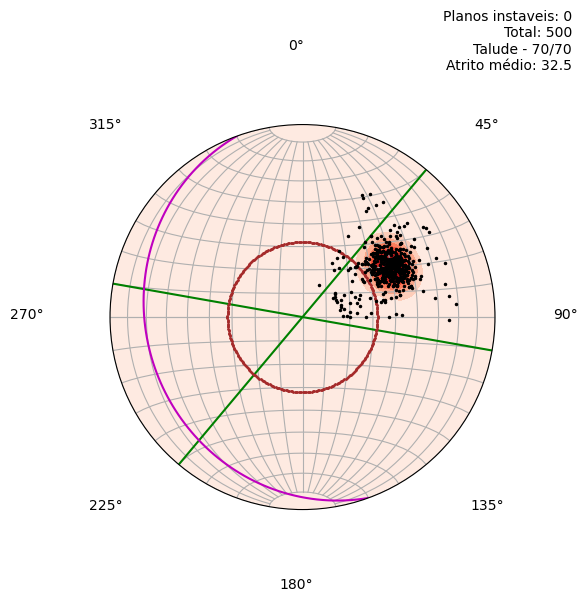

In [15]:
planar_stereogram(df,dipdir_slope_mean,dip_slope_mean,web=False )